# ER Model Comparison

In [12]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [13]:
G = nx.read_edgelist('../networkx_format_network.txt', comments='#',
                     create_using=nx.DiGraph(), 
                     delimiter=',', 
                     nodetype=int, 
                     encoding='utf-8')

In [18]:
G_undirected = nx.read_edgelist('../networkx_format_network.txt', comments='#',
                     create_using=nx.Graph(), 
                     delimiter=',', 
                     nodetype=int, 
                     encoding='utf-8')

## Basic Statistics of Network

### Plot Function

In [ ]:
#TBD

### Degree (in+out)

In [11]:
N = len(G)
L = G.size()
degrees = [G.degree(node) for node in G]
kmin = min(degrees)
kmax = max(degrees)

In [12]:
print("Number of nodes: ", N)
print("Number of edges: ", L)
print()
print("Average degree: ", 2*L/N)
print("Average degree (alternate calculation)", np.mean(degrees))
print()
print("Minimum degree: ", kmin)
print("Maximum degree: ", kmax)

Number of nodes:  8954
Number of edges:  13998

Average degree:  3.12664730846549
Average degree (alternate calculation) 3.12664730846549

Minimum degree:  1
Maximum degree:  381


### In-Degree

In [12]:
in_degrees = [G.in_degree(node) for node in G]
k_in_min = min(in_degrees)
k_in_max = max(in_degrees)

In [13]:
print("Average In degree (alternate calculation)", np.mean(in_degrees))
print()
print("Minimum degree: ", k_in_min)
print("Maximum degree: ", k_in_max)

Average In degree (alternate calculation) 1.563323654232745

Minimum degree:  0
Maximum degree:  378


### Out-Degree

In [18]:
out_degrees = [G.out_degree(node) for node in G]
k_out_min = min(out_degrees)
k_out_max = max(out_degrees)

In [19]:
print("Average Out degree (alternate calculation)", np.mean(out_degrees))
print()
print("Minimum degree: ", k_out_min)
print("Maximum degree: ", k_out_max)

Average Out degree (alternate calculation) 1.563323654232745

Minimum degree:  0
Maximum degree:  105


## ER Network

In [47]:
ER_G = nx.gnp_random_graph(len(G),0.00036)
# this probability is what gets us the closest average k value

### Basics

In [48]:
N_ER = len(ER_G)
L_ER = ER_G.size()
degrees_er = [ER_G.degree(node) for node in ER_G]
kmin_er = min(degrees_er)
kmax_er = max(degrees_er)

print("Number of nodes: ", N_ER)
print("Number of edges: ", L_ER)
print()
print("Average degree: ", 2*L_ER/N_ER)
print("Average degree (alternate calculation)", np.mean(degrees_er))
print()
print("Minimum degree: ", kmin_er)
print("Maximum degree: ", kmax_er)

Number of nodes:  8954
Number of edges:  14407

Average degree:  3.218003127094036
Average degree (alternate calculation) 3.218003127094036

Minimum degree:  0
Maximum degree:  14


### Global Clustering Coefficient

In [49]:
clustering_coef = nx.average_clustering(ER_G)

### Transitivity

In [50]:
transitivity = nx.transitivity(ER_G)

### Average Path Length

In [51]:
avg_path_length = nx.average_shortest_path_length(ER_G)

NetworkXError: Graph is not connected.

In [23]:
import csv


In [102]:
clustering_coefs= []
transitivity_metrics = []
probability = 0.00036

for i in range(100):   
    print(i)
    ER_G = nx.gnp_random_graph(len(G),probability, directed=True)
    degrees_er = [ER_G.degree(node) for node in ER_G]
    avg_k = np.mean(degrees_er)
    if (avg_k >=3.08 and avg_k <=3.145):
        #Then run the calculate metrics here 
        transitivity_metrics.append(nx.transitivity(ER_G))
        clustering_coefs.append(nx.average_clustering(ER_G))
        # Persist the node degrees to a csv
        degrees = [ER_G.degree(node) for node in ER_G]
        out_degrees = [ER_G.out_degree(node) for node in ER_G]
        in_degrees = [ER_G.in_degree(node) for node in ER_G]
        
        clustering = [nx.clustering(ER_G, node) for node in ER_G]
        
        with open('er_degrees_2.csv', mode='a', newline='') as f:
                csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                csv_writer.writerow(degrees) 
                
        with open('er_in_degrees_2.csv', mode='a', newline='') as f:
                csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                csv_writer.writerow(out_degrees) 
                
        with open('er_out_degrees_2.csv', mode='a', newline='') as f:
                csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                csv_writer.writerow(in_degrees)
                
        with open('er_clustering_2.csv', mode='a', newline='') as f:
                csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                csv_writer.writerow(clustering) 
                
                
        
        
    else:
        # Find the ratio 
        ratio_change = 3.12664730846549 / avg_k
        probability = ratio_change * probability


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [2]:
import pandas as pd

In [103]:

c  = pd.DataFrame(clustering_coefs)
t = pd.DataFrame(transitivity_metrics)

c.to_csv("er_clustering_2.csv")
t.to_csv("er_transitivity_2.csv")

In [4]:
#load the Data in from Pandas and average it
c_df = pd.read_csv("clustering_coef_er_models")
t_df = pd.read_csv("transitivity")

In [6]:
c_df.tail()

,Unnamed: 0,0
624,624,0.000141
625,625,0.000254
626,626,0.000264
627,627,0.000513
628,628,0.000102


In [7]:
t_df.tail()

,Unnamed: 0,0
624,624,0.000278
625,625,0.000416
626,626,0.000354
627,627,0.000631
628,628,0.000206


In [10]:
c_df["0"].mean()

0.0002902406586596367

In [11]:
t_df["0"].mean()

0.00034953341610985004

In [15]:
#Actual Graph Transitivity
nx.transitivity(G)

0.020056849493865474

In [28]:
#Actual Graph Cluster Coefficient 
nx.average_clustering(G)

0.009245250908573041

## Degree Distributions

### Collect average degree 

In [35]:
headers = []
for i in range(8954):
     headers.append("node{}".format(i))
    

    
with open('er_degrees.csv', mode='a', newline='') as f:
                csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                csv_writer.writerow(headers) 

In [38]:
degrees = pd.read_csv("er_degrees.csv")

In [46]:
df = degrees.transpose()

In [47]:
df

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
node0,4,4,6,3,1,3,2,5,6,3,...,4,2,3,3,6,3,6,4,2,6
node1,4,4,2,5,1,6,3,4,3,0,...,2,4,4,1,3,3,3,0,7,2
node2,0,3,3,5,7,1,3,3,3,3,...,1,3,5,0,6,1,3,4,6,2
node3,3,4,1,5,3,5,1,2,4,3,...,1,2,3,3,0,1,2,0,2,1
node4,4,7,3,4,2,2,6,3,2,2,...,2,4,4,2,1,4,2,4,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
node8949,0,7,5,3,0,6,3,5,3,1,...,5,3,2,7,3,2,4,2,3,3
node8950,4,3,1,3,7,0,5,3,0,0,...,5,5,5,3,4,3,3,5,1,3
node8951,6,1,2,2,4,3,2,2,3,2,...,3,5,1,2,0,2,3,4,3,5
node8952,5,4,1,2,1,4,2,3,2,3,...,4,1,2,4,5,3,3,2,4,1


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

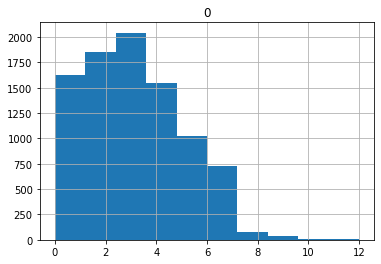

In [55]:
df.hist(column=0)

In [56]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
count,8954.000000,8954.000000,8954.000000,8954.000000,8954.000000,8954.000000,8954.000000,8954.000000,8954.000000,8954.000000,...,8954.000000,8954.000000,8954.000000,8954.000000,8954.000000,8954.000000,8954.000000,8954.000000,8954.000000,8954.000000
mean,3.144963,3.138932,3.095823,3.141166,3.116819,3.101184,3.126871,3.125977,3.132231,3.108108,...,3.098950,3.136029,3.125084,3.105874,3.101854,3.105651,3.126424,3.086442,3.090239,3.090686
std,1.782858,1.763118,1.749592,1.772230,1.762885,1.758715,1.755140,1.772051,1.781842,1.777321,...,1.755918,1.789439,1.784613,1.751501,1.756261,1.781109,1.778751,1.750017,1.732763,1.745008
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,12.000000,11.000000,11.000000,12.000000,12.000000,11.000000,12.000000,12.000000,12.000000,12.000000,...,13.000000,12.000000,12.000000,11.000000,11.000000,12.000000,11.000000,11.000000,10.000000,11.000000


In [79]:
df[44].value_counts()

3     2009
2     1953
4     1569
1     1221
5      946
6      514
0      411
7      204
8       91
9       22
10       8
11       3
12       2
13       1
Name: 44, dtype: int64

In [80]:
freq = df[44].value_counts().to_frame()


    

In [81]:
freq

,44
3,2009
2,1953
4,1569
1,1221
5,946
6,514
0,411
7,204
8,91
9,22


In [82]:
for i in range(0,54):
    freq[i] = df[i].value_counts().to_frame()

In [83]:
freq

,44,0,1,2,3,4,5,6,7,8,...,43,45,46,47,48,49,50,51,52,53
3,2009,2043.0,2014.0,1989.0,2032.0,2050.0,2013.0,2000.0,2061.0,1987.0,...,1985.0,1961.0,1934.0,1973.0,2010.0,1926.0,2030.0,2034.0,1993.0,2002.0
2,1953,1848.0,1884.0,1944.0,1881.0,1914.0,1963.0,1964.0,1853.0,2003.0,...,1946.0,1875.0,1899.0,1962.0,1941.0,1952.0,1953.0,1937.0,1994.0,1993.0
4,1569,1545.0,1536.0,1564.0,1589.0,1517.0,1547.0,1547.0,1544.0,1515.0,...,1568.0,1602.0,1565.0,1592.0,1564.0,1585.0,1523.0,1534.0,1535.0,1580.0
1,1221,1247.0,1192.0,1264.0,1209.0,1254.0,1217.0,1205.0,1294.0,1216.0,...,1192.0,1272.0,1251.0,1190.0,1248.0,1235.0,1199.0,1287.0,1285.0,1231.0
5,946,1022.0,1019.0,970.0,977.0,935.0,946.0,991.0,969.0,966.0,...,982.0,985.0,1007.0,986.0,952.0,951.0,979.0,941.0,978.0,932.0
6,514,490.0,542.0,498.0,493.0,537.0,495.0,508.0,496.0,516.0,...,505.0,475.0,530.0,504.0,494.0,525.0,483.0,502.0,501.0,491.0
0,411,383.0,416.0,392.0,394.0,384.0,412.0,382.0,366.0,373.0,...,403.0,389.0,418.0,422.0,395.0,431.0,402.0,385.0,352.0,391.0
7,204,240.0,231.0,205.0,238.0,242.0,244.0,234.0,232.0,220.0,...,231.0,237.0,209.0,202.0,221.0,217.0,235.0,209.0,195.0,206.0
8,91,79.0,94.0,91.0,91.0,84.0,78.0,81.0,83.0,106.0,...,94.0,109.0,93.0,82.0,90.0,87.0,101.0,78.0,78.0,81.0
9,22,35.0,19.0,28.0,38.0,29.0,27.0,35.0,43.0,38.0,...,31.0,34.0,34.0,29.0,25.0,24.0,33.0,39.0,37.0,37.0


In [84]:
#SUM THE ROW AND DIVIDE BY 53

In [87]:
summed_freq = freq.sum(axis=1).to_frame()

In [88]:
summed_freq

,0
3,108159.0
2,103628.0
4,84498.0
1,67181.0
5,52223.0
6,27377.0
0,21400.0
7,11912.0
8,4743.0
9,1738.0


In [95]:
bin_edges = np.linspace(df[0].min(), df[0].max(), num=12)
density, _ = np.histogram(df[0], bins=bin_edges, density=False)

c:\users\kaitlin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


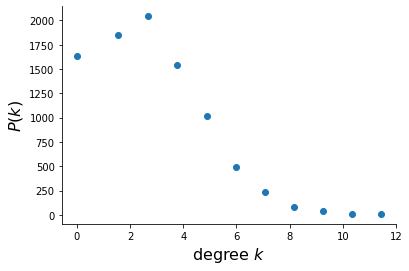

In [96]:
fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.plot(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()